In [1]:
import pandas as pd
import sys
sys.path.append(r"E:\work\IT\trading\MyCode\BollBacktester.py")  # Add the directory to the Python path

from BollBacktester import BollBacktester  # Import the class

In [3]:
filepath = "one_minute.csv"
symbol = "EURUSD"

start1 = "2018-01-01"
end1 = "2018-03-31"
start2 = "2018-04-01"
end2 = "2018-06-30"
start3 = "2018-07-01"
end3 = "2018-09-30"
start4 = "2018-10-01"
end4 = "2018-12-31"

end5 = "2019-06-30"

ptc = 0.00007

__1. Quarter 2018__

In [11]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = start1, end = end1, tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-01-01, end = 2018-03-31)

In [12]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") # keep dev constant (2)

Frequency: 261 | Windows: 76 | Devs: 2 | Multiple: 1.077016
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 261min | WINDOW = 76
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.077016
Multiple (Buy-and-Hold):     1.005671
--------------------------------------
Out-/Underperformance:       0.071345


CAGR:                        0.472752
Annualized Mean:             0.39381
Annualized Std:              0.054819
Sharpe Ratio:                7.183817
Sortino Ratio:               10.505732
Maximum Drawdown:            0.014632
Calmar Ratio:                32.309195
Max Drawdown Duration:       16 Days
Kelly Criterion:             131.54278


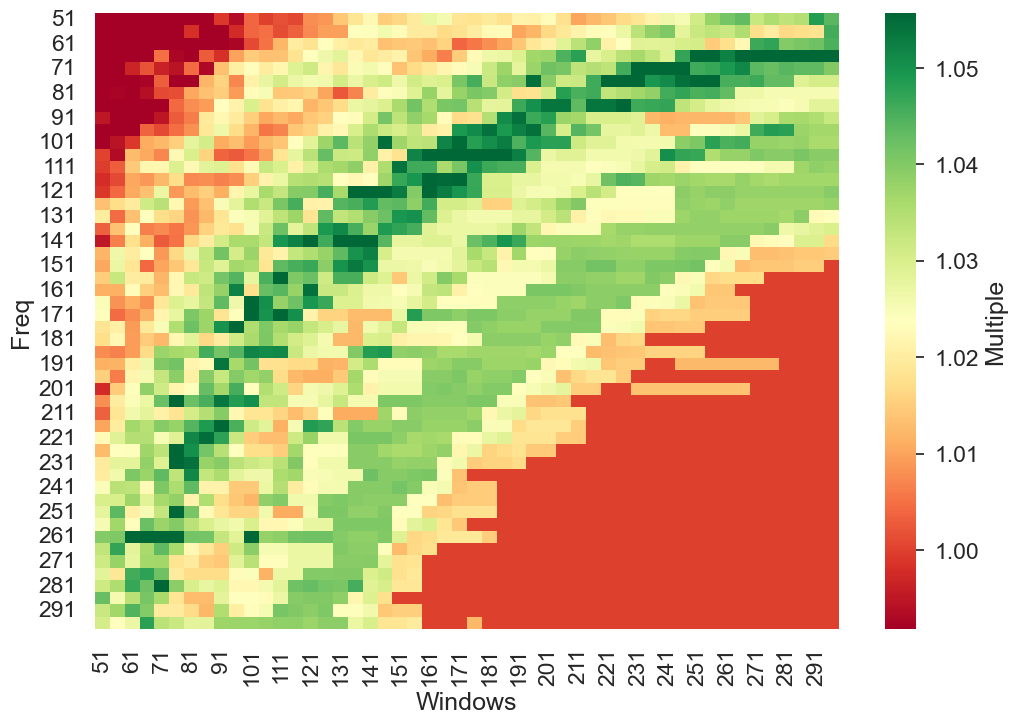

In [13]:
tester.visualize_many()

In [14]:
q1 = tester.results_overview
q1

,Freq,Windows,Devs,Performance
0,51,51,2,0.979986
1,51,56,2,0.970590
2,51,61,2,0.970010
3,51,66,2,0.966739
4,51,71,2,0.953956
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__2. Quarter 2018__

In [15]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = start2, end = end2, tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-04-01, end = 2018-06-30)

In [16]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") 

Frequency: 151 | Windows: 296 | Devs: 2 | Multiple: 1.040427
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 151min | WINDOW = 296
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.040427
Multiple (Buy-and-Hold):     0.977096
--------------------------------------
Out-/Underperformance:       0.063331


CAGR:                        0.369826
Annualized Mean:             0.308189
Annualized Std:              0.060563
Sharpe Ratio:                5.088695
Sortino Ratio:               7.491252
Maximum Drawdown:            0.011491
Calmar Ratio:                32.183683
Max Drawdown Duration:       7 Days
Kelly Criterion:             84.514938


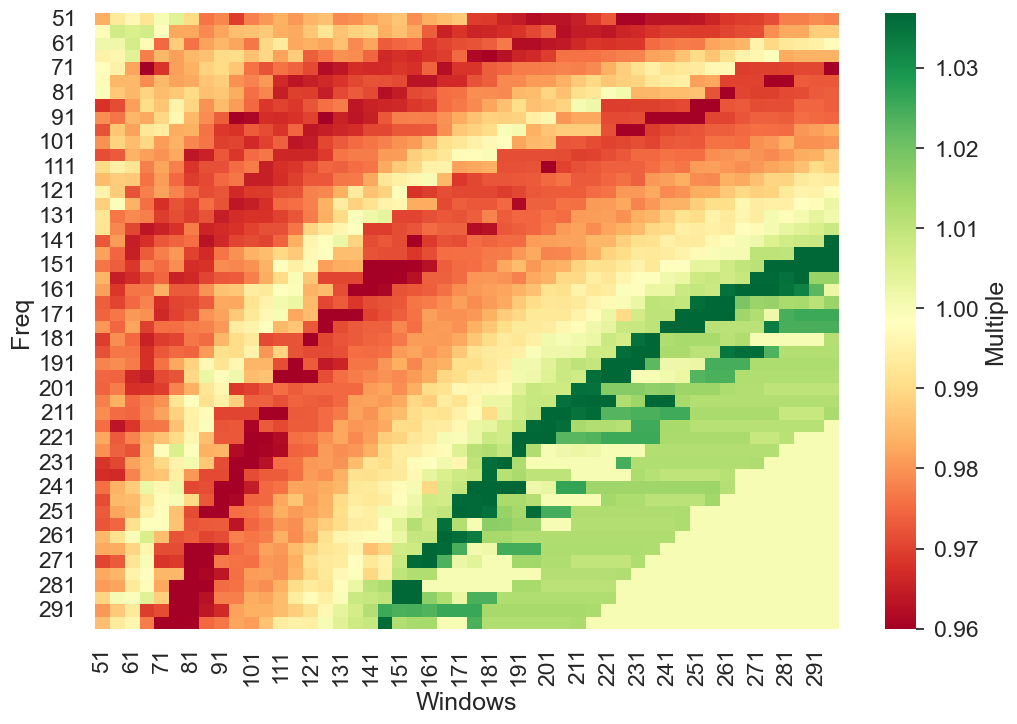

In [17]:
tester.visualize_many()

In [18]:
q2 = tester.results_overview
q2

,Freq,Windows,Devs,Performance
0,51,51,2,0.983230
1,51,56,2,0.993074
2,51,61,2,0.996624
3,51,66,2,0.992120
4,51,71,2,0.999971
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__3. Quarter 2018__

In [19]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = start3, end = end3, tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-07-01, end = 2018-09-30)

In [20]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") 

Frequency: 131 | Windows: 141 | Devs: 2 | Multiple: 1.026516
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 131min | WINDOW = 141
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.026516
Multiple (Buy-and-Hold):     0.998769
--------------------------------------
Out-/Underperformance:       0.027747


CAGR:                        0.137889
Annualized Mean:             0.130252
Annualized Std:              0.052781
Sharpe Ratio:                2.467771
Sortino Ratio:               3.521257
Maximum Drawdown:            0.027909
Calmar Ratio:                4.940726
Max Drawdown Duration:       37 Days
Kelly Criterion:             47.256515


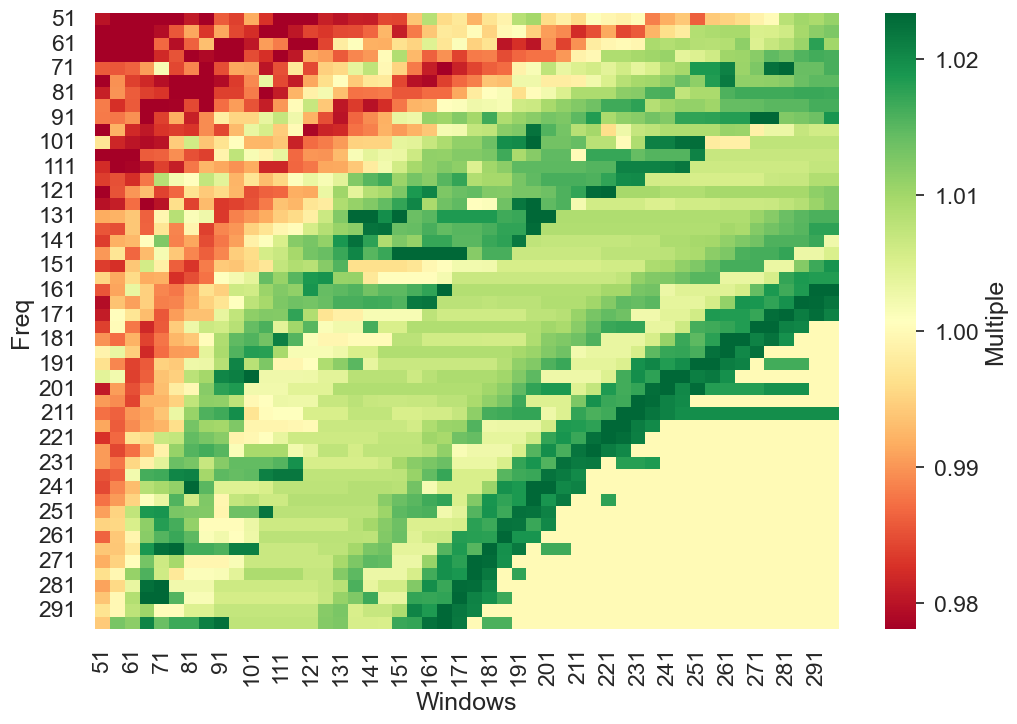

In [21]:
tester.visualize_many()

In [22]:
q3 = tester.results_overview
q3

,Freq,Windows,Devs,Performance
0,51,51,2,0.979914
1,51,56,2,0.975474
2,51,61,2,0.977769
3,51,66,2,0.973802
4,51,71,2,0.975789
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__4. Quarter 2018__

In [23]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = start4, end = end4, tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-10-01, end = 2018-12-31)

In [24]:
tester.optimize_strategy((51, 301, 5), (51, 301, 5), (2, 3, 1), metric = "Multiple") 

Frequency: 206 | Windows: 61 | Devs: 2 | Multiple: 1.069108
SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 206min | WINDOW = 61
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.069108
Multiple (Buy-and-Hold):     0.991893
--------------------------------------
Out-/Underperformance:       0.077215


CAGR:                        0.351657
Annualized Mean:             0.309078
Annualized Std:              0.049472
Sharpe Ratio:                6.247474
Sortino Ratio:               9.141535
Maximum Drawdown:            0.011076
Calmar Ratio:                31.749171
Max Drawdown Duration:       12 Days
Kelly Criterion:             126.775854


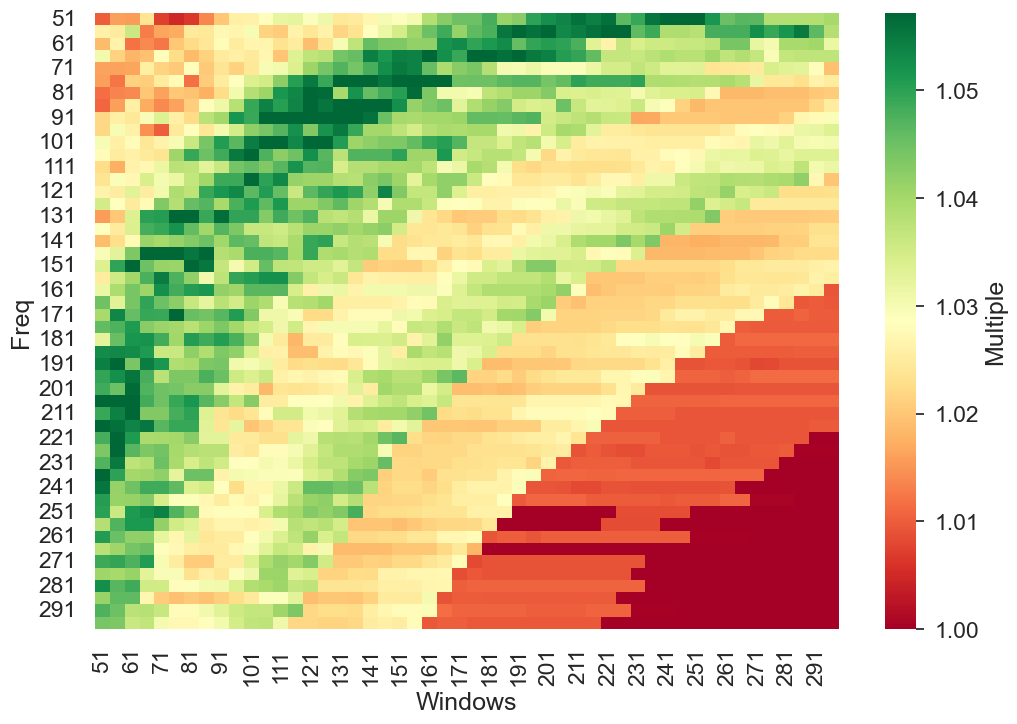

In [25]:
tester.visualize_many()

In [26]:
q4 = tester.results_overview
q4

,Freq,Windows,Devs,Performance
0,51,51,2,1.010099
1,51,56,2,1.015911
2,51,61,2,1.015817
3,51,66,2,1.023942
4,51,71,2,1.007187
...,...,...,...,...
2495,296,276,2,1.000000
2496,296,281,2,1.000000
2497,296,286,2,1.000000
2498,296,291,2,1.000000


__Comparing all four quarters__


In [27]:
# Concatenate DataFrames
comp = pd.concat([q1, q2, q3, q4], axis=1)

# Select relevant columns for output
comp = comp.iloc[:, [0, 1, 2, 3, 7, 11, 15]]  # Adjust column indices as needed

# Rename columns for clarity
comp.columns = ["Freq", "Windows", "Dev", "Performance_Q1", "Performance_Q2", "Performance_Q3", "Performance_Q4"]

comp = comp.dropna()

# Calculate the mean of performance columns
comp["Score1"] = comp[["Performance_Q1", "Performance_Q2", "Performance_Q3", "Performance_Q4"]].mean(axis=1)
comp

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1
0,51,51,2,0.979986,0.983230,0.979914,1.010099,0.988307
1,51,56,2,0.970590,0.993074,0.975474,1.015911,0.988762
2,51,61,2,0.970010,0.996624,0.977769,1.015817,0.990055
3,51,66,2,0.966739,0.992120,0.973802,1.023942,0.989151
4,51,71,2,0.953956,0.999971,0.975789,1.007187,0.984226
...,...,...,...,...,...,...,...,...
2495,296,276,2,1.000000,1.000000,1.000000,1.000000,1.000000
2496,296,281,2,1.000000,1.000000,1.000000,1.000000,1.000000
2497,296,286,2,1.000000,1.000000,1.000000,1.000000,1.000000
2498,296,291,2,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
comp.iloc[:, 3:7].rank(ascending = False)

,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4
0,2482.0,1387.0,2433.0,2116.0
1,2496.0,1015.0,2476.0,1998.0
2,2497.0,881.0,2453.0,2000.0
3,2498.0,1057.0,2484.0,1581.0
4,2500.0,792.0,2473.0,2316.0
...,...,...,...,...
2495,2160.0,684.0,1738.5,2421.0
2496,2160.0,684.0,1738.5,2421.0
2497,2160.0,684.0,1738.5,2421.0
2498,2160.0,684.0,1738.5,2421.0


In [29]:
comp["Score2"] = (comp.iloc[:, 3:7].rank(ascending = False)**2).mean(axis = 1) # mean rank
comp

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1,Score2
0,51,51,2,0.979986,0.983230,0.979914,1.010099,0.988307,4.620260e+06
1,51,56,2,0.970590,0.993074,0.975474,1.015911,0.988762,4.345705e+06
2,51,61,2,0.970010,0.996624,0.977769,1.015817,0.990055,4.257095e+06
3,51,66,2,0.966739,0.992120,0.973802,1.023942,0.989151,4.006768e+06
4,51,71,2,0.953956,0.999971,0.975789,1.007187,0.984226,4.589212e+06
...,...,...,...,...,...,...,...,...,...
2495,296,276,2,1.000000,1.000000,1.000000,1.000000,1.000000,3.504270e+06
2496,296,281,2,1.000000,1.000000,1.000000,1.000000,1.000000,3.504270e+06
2497,296,286,2,1.000000,1.000000,1.000000,1.000000,1.000000,3.504270e+06
2498,296,291,2,1.000000,1.000000,1.000000,1.000000,1.000000,3.504270e+06


In [30]:
comp.sort_values(by = "Score1", ascending = False).head(20)

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1,Score2
576,106,181,2,1.073722,0.999877,1.012895,1.037985,1.031120,353477.8125
916,141,131,2,1.066028,1.002191,1.018941,1.036377,1.030884,226528.5000
2103,261,66,2,1.062159,1.006051,1.011795,1.042009,1.030503,212215.0000
917,141,136,2,1.069799,0.988824,1.022352,1.038379,1.029838,444702.7500
914,141,121,2,1.058782,0.995689,1.013093,1.049291,1.029214,298721.7500
573,106,166,2,1.060184,0.992544,1.011024,1.051281,1.028758,399138.2500
1062,156,111,2,1.060614,0.990136,1.010799,1.052041,1.028397,443741.2500
1755,226,76,2,1.056343,1.005890,1.010919,1.039905,1.028264,256460.7500
195,66,276,2,1.069766,0.998870,1.014583,1.029673,1.028223,548637.5000
574,106,171,2,1.066518,0.997713,1.012229,1.035162,1.027905,449818.0625


In [31]:
comp.sort_values(by = "Score2", ascending = True).head(20)

,Freq,Windows,Dev,Performance_Q1,Performance_Q2,Performance_Q3,Performance_Q4,Score1,Score2
819,131,146,2,1.042172,1.003299,1.019694,1.040770,1.026484,145535.0625
2103,261,66,2,1.062159,1.006051,1.011795,1.042009,1.030503,212215.0000
916,141,131,2,1.066028,1.002191,1.018941,1.036377,1.030884,226528.5000
1755,226,76,2,1.056343,1.005890,1.010919,1.039905,1.028264,256460.7500
1457,196,86,2,1.039678,1.002295,1.009789,1.047722,1.024871,262085.2500
672,116,161,2,1.055671,1.000123,1.011827,1.039899,1.026880,264658.5000
1163,166,116,2,1.041752,1.002534,1.013615,1.038141,1.024011,265915.2500
1459,196,96,2,1.039898,1.001688,1.021096,1.035533,1.024553,270581.5000
1063,156,116,2,1.040384,0.999732,1.015200,1.042964,1.024570,277048.2500
720,121,151,2,1.052988,0.999228,1.012740,1.043233,1.027047,290523.7500


## Backtesting / Forward Testing a stable Strategy

In [4]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = "2018-01-01", end = end1, tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2018-01-01, end = 2018-03-31)

In [5]:
tester.export_resampled_data(freq=141, window=131, dev=2, file_path="one_minute_resampled_data.csv")

Resampled data successfully exported to one_minute_resampled_data.csv


In [6]:
tester.test_strategy(141, 131, 2)

SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 141min | WINDOW = 131
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.066028
Multiple (Buy-and-Hold):     1.006263
--------------------------------------
Out-/Underperformance:       0.059765


CAGR:                        0.389481
Annualized Mean:             0.334235
Annualized Std:              0.056318
Sharpe Ratio:                5.934788
Sortino Ratio:               8.662188
Maximum Drawdown:            0.014632
Calmar Ratio:                26.618227
Max Drawdown Duration:       16 Days
Kelly Criterion:             105.876876


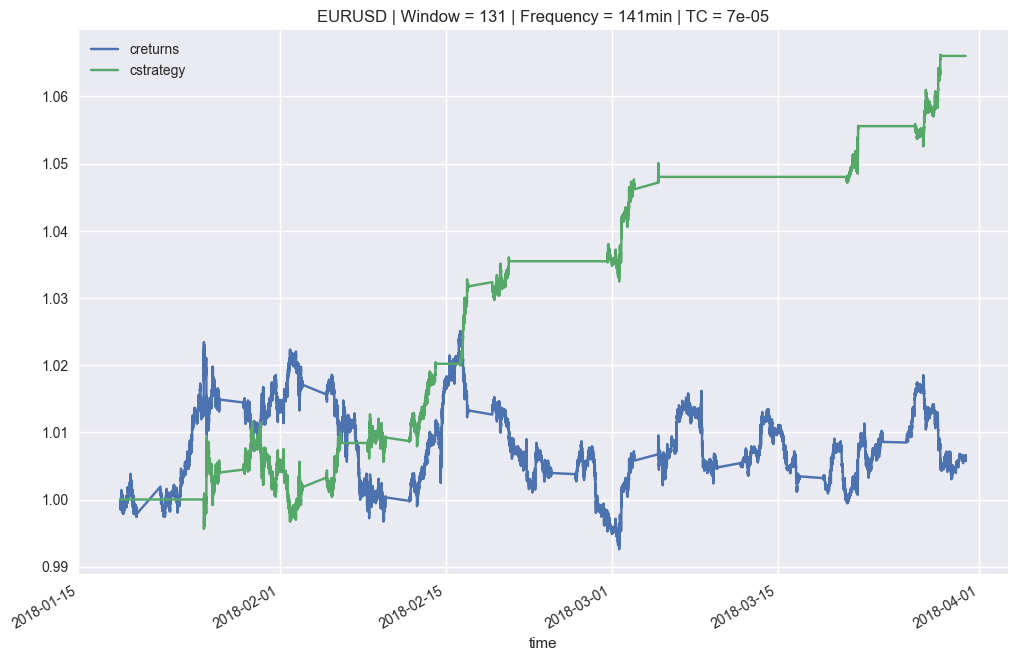

In [7]:
tester.plot_results()

In [8]:
tester.add_leverage(50, sl = -0.4)

SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 141min | WINDOW = 131
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         12.764928
Multiple (Buy-and-Hold):     1.006263
--------------------------------------
Out-/Underperformance:       11.758665


CAGR:                        489511.20917
Annualized Mean:             13.312459
Annualized Std:              2.437427
Sharpe Ratio:                5.461685
Sortino Ratio:               7.918917
Maximum Drawdown:            0.46831
Calmar Ratio:                1045271.509228
Max Drawdown Duration:       16 Days
Kelly Criterion:             2.737769


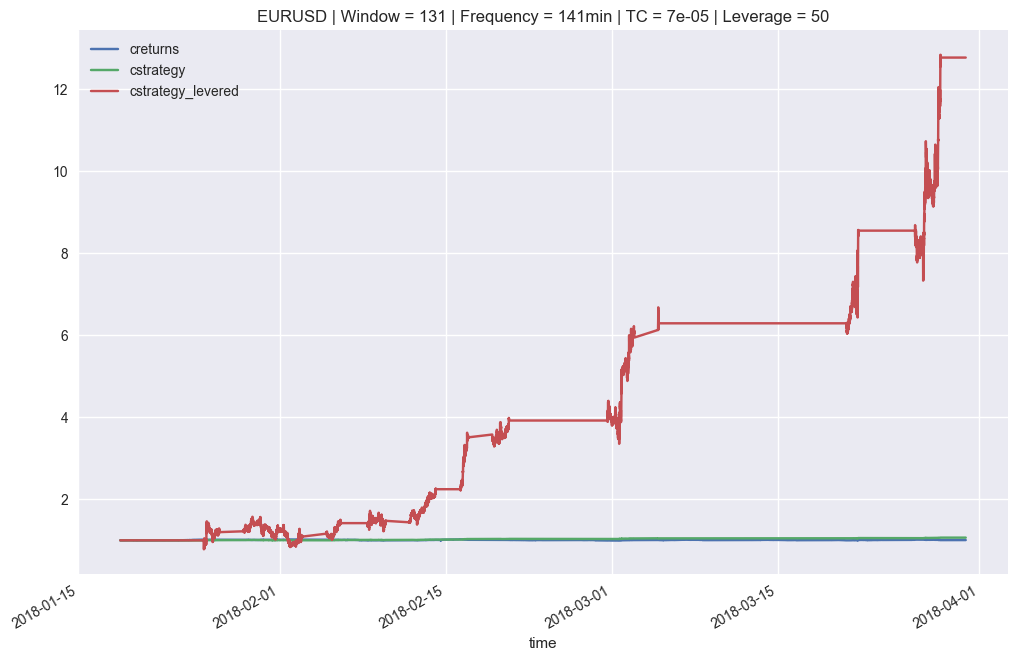

In [9]:
tester.plot_results(leverage=True)

__Forward Testing__

In [10]:
tester = BollBacktester(filepath = filepath, symbol = symbol, start = "2019-01-01", end = "2019-12-31", tc = ptc)
tester

BollBacktester(symbol = EURUSD, start = 2019-01-01, end = 2019-12-31)

In [11]:
tester.test_strategy(141, 131, 2)

SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 141min | WINDOW = 131
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         1.084081
Multiple (Buy-and-Hold):     0.981821
--------------------------------------
Out-/Underperformance:       0.10226


CAGR:                        0.088961
Annualized Mean:             0.085464
Annualized Std:              0.038169
Sharpe Ratio:                2.239115
Sortino Ratio:               3.20063
Maximum Drawdown:            0.017082
Calmar Ratio:                5.20805
Max Drawdown Duration:       97 Days
Kelly Criterion:             59.163107


In [12]:
tester.add_leverage(50, sl = -0.4)

SIMPLE BOLLINGER BAND STRATEGY | INSTRUMENT = EURUSD | Freq: 141min | WINDOW = 131
----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         4.627944
Multiple (Buy-and-Hold):     0.981821
--------------------------------------
Out-/Underperformance:       3.646123


CAGR:                        4.039733
Annualized Mean:             1.621904
Annualized Std:              1.845173
Sharpe Ratio:                0.878998
Sortino Ratio:               1.223071
Maximum Drawdown:            0.852155
Calmar Ratio:                4.740608
Max Drawdown Duration:       213 Days
Kelly Criterion:             0.980547


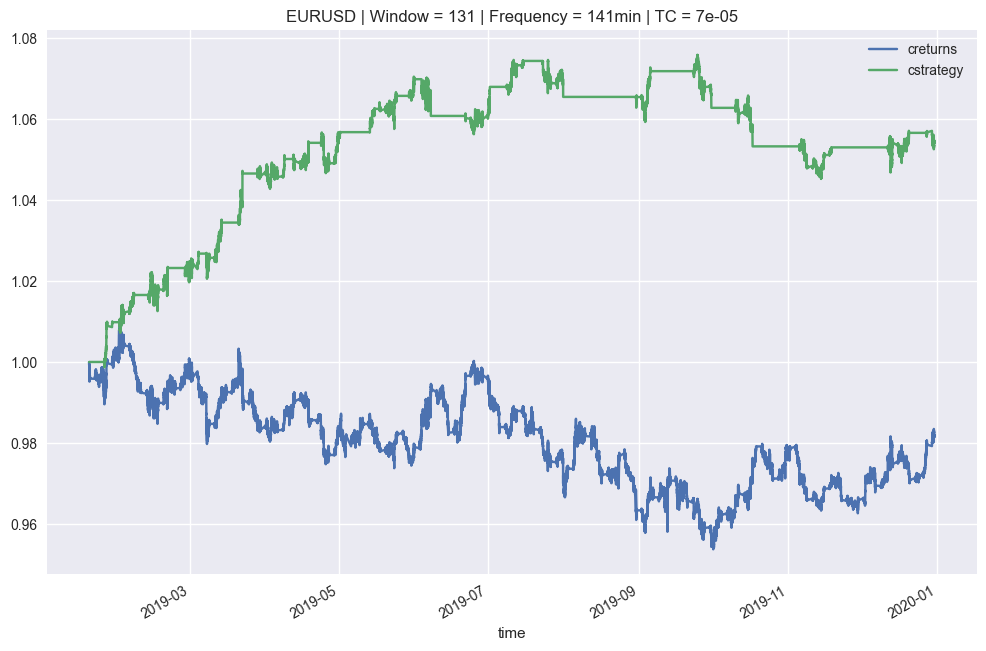

In [13]:
tester.plot_results()

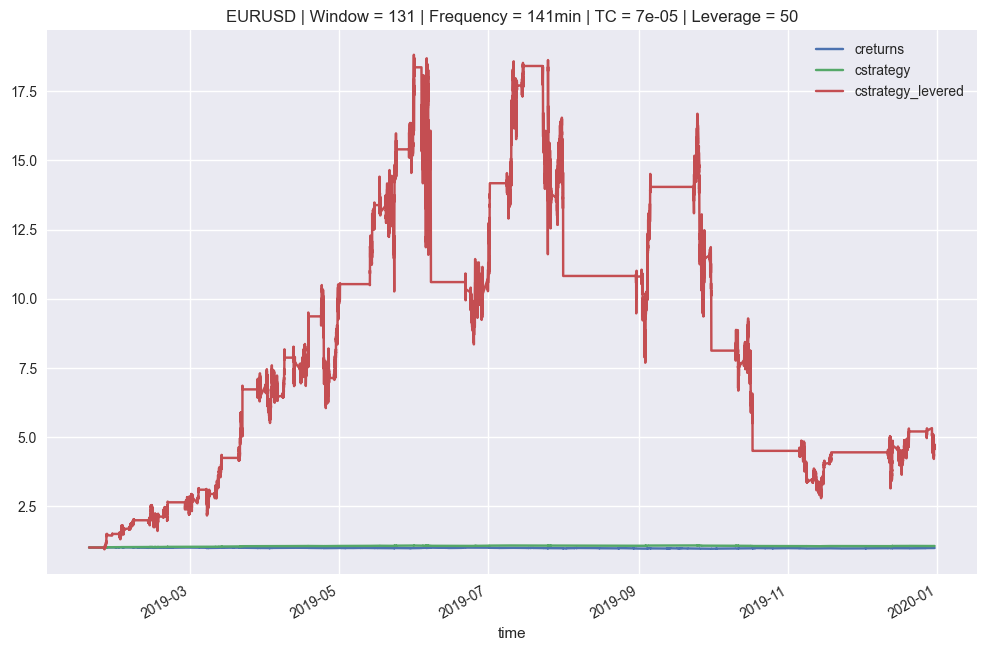

In [14]:
tester.plot_results(leverage=True)

__Iterative Testing__

In [4]:
import IterativeBacktest as IB

In [ ]:
bc = IB.IterativeBacktest(symbol, "2018-01-18", "2018-03-30", 100000, use_spread = True)

Loading data from: one_minute_resampled_data.csv
Date range: 2018-01-18 to 2018-01-31
Data loaded. Total rows before filtering: 535
Total rows after filtering by date range: 100
Data successfully loaded and processed.


In [7]:
bc.data

,price,SMA,Lower,Upper,distance,position,returns
time,,,,,,,
2018-01-18 10:18:00,1.22458,1.208017,1.185860,1.230174,0.016563,0.0,NaN
2018-01-18 12:39:00,1.22606,1.208205,1.185857,1.230553,0.017855,0.0,0.001208
2018-01-18 15:00:00,1.22468,1.208378,1.185873,1.230884,0.016302,0.0,-0.001126
2018-01-18 17:21:00,1.22416,1.208551,1.185911,1.231191,0.015609,0.0,-0.000425
2018-01-18 19:42:00,1.22370,1.208714,1.185947,1.231482,0.014986,0.0,-0.000376
...,...,...,...,...,...,...,...
2018-01-31 13:12:00,1.24674,1.231787,1.214215,1.249359,0.014953,-1.0,0.000786
2018-01-31 15:33:00,1.24164,1.231949,1.214407,1.249490,0.009691,-1.0,-0.004099
2018-01-31 17:54:00,1.24165,1.232106,1.214590,1.249623,0.009544,-1.0,0.000008


In [45]:
bc.test_boll_strategy(131, 2)

---------------------------------------------------------------------------
Testing Bollinger Bands Strategy | EURUSD | SMA = 131 & dev = 2
---------------------------------------------------------------------------
2007-07-09 |  Selling 72745 for 1.37466
2007-08-13 |  Buying 72745 for 1.35337
2007-09-11 |  Selling 73046 for 1.39019
2008-02-06 |  Buying 73046 for 1.44854
2008-02-26 |  Selling 64342 for 1.512
2008-07-28 |  Buying 64342 for 1.55887
2008-08-06 |  Buying 61510 for 1.5326
2008-12-15 |  Selling 61510 for 1.39982
2009-05-21 |  Selling 61532 for 1.39932
2009-12-10 |  Buying 61532 for 1.462
2010-01-19 |  Buying 58301 for 1.4107
2010-07-14 |  Selling 58301 for 1.29492
2010-09-21 |  Selling 56320 for 1.34047
2010-11-25 |  Buying 56320 for 1.32467
2011-03-17 |  Selling 53880 for 1.41769
2011-06-23 |  Buying 53880 for 1.41928
2011-09-07 |  Buying 54961 for 1.38826
2011-10-26 |  Selling 54961 for 1.41861
2011-12-12 |  Buying 59798 for 1.30385
2012-02-22 |  Selling 59798 for 1.33717
